# Plot M2 amplitude and phase for tidal runs and for FES2014

In [2]:
#import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator
import pandas as pd
import scipy.stats
from cartopy import crs as ccrs
import xarray as xr
import xesmf as xe
#import xgcm

### Load data

In [3]:
absolute_data_dir_path="/gws/nopw/j04/class_vol2/senemo/RUNS2024r01/"
### TEMPORARY MASHUP TO WORK ON OLD DATA WHILE WAITING FOR MODEL RUN TO PROGRESS:
relative_data_dir_path="../data/raw/RUNS2024r01/"

relative_data_dir_path_mashup="../data/raw/"


#T-grid files
### TEMPORARY MASHUP TO WORK ON OLD DATA WHILE WAITING FOR MODEL RUN TO PROGRESS:
fn_ZPS_REF_TIDE= relative_data_dir_path_mashup + "GS1p1_tide/output/SENEMO_1y_19810101_19811231_grid_T_2D.nc"

#fn_ZPS_REF_TIDE= relative_data_dir_path + "GS1p1_tide/output/SENEMO_1y_19810101_19811231_grid_T_2D.nc"

fn_MES_REF_TIDE= relative_data_dir_path + "GS1p2_full/output/SENEMO_1y_19810101_19811231_grid_T_2D.nc"

dsZPS_REF_TIDE=xr.open_dataset(fn_ZPS_REF_TIDE)
dsMES_REF_TIDE=xr.open_dataset(fn_MES_REF_TIDE)

In [4]:
# Load the model grid for ZPS and MES 
fn_domcfg_ZPS= relative_data_dir_path + "GS1p1_tide/config/domain_cfg.nc"  #symbolic link, which points to correct file
fn_domcfg_MES= relative_data_dir_path + "GS1p2_full/config/domain_cfg.nc"  #symbolic link, which points to correct file
domcfgZPS = xr.open_dataset(fn_domcfg_ZPS)  
domcfgMES = xr.open_dataset(fn_domcfg_MES)

In [5]:
# Load the FES2014 tidal data

absolute_FES_data_dir_path="/gws/nopw/j04/class_vol2/senemo/shared/FES2014/"
relative_FES_data_dir_path="../data/external/FES2014/"

fn_FES2014_M2 = relative_FES_data_dir_path + "M2_z.nc"
m2fes=xr.open_dataset(fn_FES2014_M2)

fn_FES2014_S2 = relative_FES_data_dir_path + "S2_z.nc"
s2fes=xr.open_dataset(fn_FES2014_S2)

fn_FES2014_K1= relative_FES_data_dir_path + "K1_z.nc"
k1fes=xr.open_dataset(fn_FES2014_K1)

fn_FES2014_K2 = relative_FES_data_dir_path + "K2_z.nc"
k2fes=xr.open_dataset(fn_FES2014_K2)

fn_FES2014_N2= relative_FES_data_dir_path + "N2_z.nc"
n2fes=xr.open_dataset(fn_FES2014_N2)

fn_FES2014_O1 = relative_FES_data_dir_path + "O1_z.nc"
o1fes=xr.open_dataset(fn_FES2014_O1)

fn_FES2014_P1 = relative_FES_data_dir_path + "P1_z.nc"
p1fes=xr.open_dataset(fn_FES2014_P1)

fn_FES2014_Q1  = relative_FES_data_dir_path + "Q1_z.nc"
q1fes=xr.open_dataset(fn_FES2014_Q1)


In [6]:
# Define depth for each grid

deptht_ZPS=domcfgZPS.bathy_metry[0,:,:]

deptht_MES=domcfgMES.bathy_meter[0,:,:]

In [7]:
dsZPS_REF_TIDE

<xarray.Dataset>
Dimensions:         (y: 1207, x: 1442, nvertex: 4)
Coordinates:
    nav_lat         (y, x) float32 ...
    nav_lon         (y, x) float32 ...
Dimensions without coordinates: y, x, nvertex
Data variables: (12/23)
    bounds_nav_lon  (y, x, nvertex) float32 ...
    bounds_nav_lat  (y, x, nvertex) float32 ...
    area            (y, x) float32 ...
    M2x             (y, x) float32 ...
    M2y             (y, x) float32 ...
    S2x             (y, x) float32 ...
    ...              ...
    K2x             (y, x) float32 ...
    K2y             (y, x) float32 ...
    P1x             (y, x) float32 ...
    P1y             (y, x) float32 ...
    MS4x            (y, x) float32 ...
    MS4y            (y, x) float32 ...
Attributes:
    name:         SENEMO_1y_19810101_19811231_grid_T_2D
    description:  tidal harmonics
    title:        tidal harmonics
    Conventions:  CF-1.6
    timeStamp:    2023-Jan-11 21:08:56 GMT
    uuid:         5ba673fa-9e68-45c4-9c24-8ee1b701fc3f

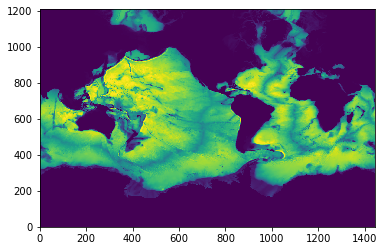

In [11]:
plt.pcolormesh(deptht_MES)

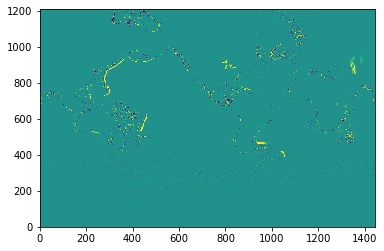

In [12]:
plt.pcolormesh(deptht_ZPS-deptht_MES,vmin=-100,vmax=100)

### Calculate M2 amplitude and phase for SSH

In [8]:
#Define a function to convert the real and imaginary components of complex number to amplitude and phase
def amp_pha_from_re_im(creal,cimag):
    cc=creal+cimag*1j
    amp=np.abs(cc)
    pha=np.angle(cc)*180/np.pi
    return(amp,pha)
    

In [9]:
#For the ZPS runs

ZPS_SSH_amp,ZPS_SSH_pha = amp_pha_from_re_im(dsZPS_REF_TIDE.M2x,dsZPS_REF_TIDE.M2y)



#For the MES runs
MES_SSH_amp,MES_SSH_pha = amp_pha_from_re_im(dsMES_REF_TIDE.M2x,dsMES_REF_TIDE.M2y)

### Interpolate FES2014 data to SENEMO grid

In [66]:
#remove the halo (1 point) from SENEMO grid
ds_out=ZPS_SSH_amp[1:-1,1:-1]
ds_in=m2fes.amplitude[1:-1,1:-1]

#test=xe.util.grid_2d(ds_out.longitude.min(),ds_out.longitude.max(),1/12,ds_out.latitude.min(),ds_out.latitude.max(),1/12)

In [70]:
ds_out

<xarray.DataArray (y: 1205, x: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    lat      (y, x) float32 -89.49 -89.49 -89.49 -89.49 ... -1.0 -1.0 -1.0 -1.0
    lon      (y, x) float32 73.0 73.25 73.5 73.75 74.0 ... -1.0 -1.0 -1.0 -1.0
Dimensions without coordinates: y, x

In [ ]:
## May need to uncomment and run the two lines below, the first time this cell is reached
#ds_in = ds_in.rename({"longitude": "lon", "latitude": "lat"})
#ds_out = ds_out.rename({"nav_lon": "lon", "nav_lat": "lat"})

## Calculate the 'regridder' (which can be applied repeatedly to arrays with grids as defined here)

In [72]:
regridder = xe.Regridder(ds_in, ds_out, 'bilinear')

In [76]:
## Apply the regridder:  regrid FES2014 M2 amplitude and phase to the SENEMO grid.  

In [78]:
M2FESamp_on_SENEMO_GRID=regridder(m2fes.amplitude[1:-1,1:-1])
M2FESpha_on_SENEMO_GRID=regridder(m2fes.phase[1:-1,1:-1])

/home/users/cwilso01/.conda/envs/senemo-env/lib/python3.9/site-packages/xesmf/frontend.py:597: UserWarning: Using dimensions ('latitude', 'longitude') from data variable amplitude as the horizontal dimensions for the regridding.
  warnings.warn(
/home/users/cwilso01/.conda/envs/senemo-env/lib/python3.9/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/home/users/cwilso01/.conda/envs/senemo-env/lib/python3.9/site-packages/xesmf/frontend.py:597: UserWarning: Using dimensions ('latitude', 'longitude') from data variable phase as the horizontal dimensions for the regridding.
  warnings.warn(


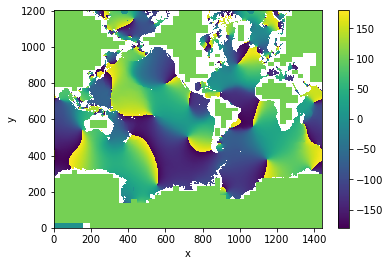

In [79]:
M2FESpha_on_SENEMO_GRID.plot(vmin=-180,vmax=180)

In [82]:
np.nanmax(m2fes.latitude[:])

87.916664

In [81]:
np.nanmax(M2FESpha_on_SENEMO_GRID.lat[:])

89.94787

In [83]:
np.nanmin(m2fes.latitude[:])

-88.0

In [84]:
np.nanmin(M2FESpha_on_SENEMO_GRID.lat[:])

-89.4875

In [87]:
#Calculate error in M2 w.r.t. FES2014
err_ZPS_SSH_amp=ZPS_SSH_amp[1:-1,1:-1]-M2FESamp_on_SENEMO_GRID
err_MES_SSH_amp=MES_SSH_amp[1:-1,1:-1]-M2FESamp_on_SENEMO_GRID


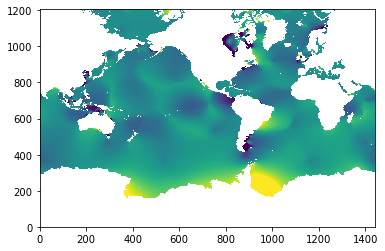

In [89]:
plt.pcolormesh(err_MES_SSH_amp,vmin=-0.5,vmax=0.5)

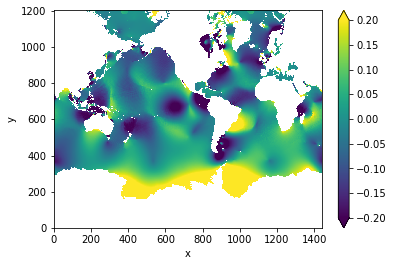

In [99]:
err_MES_SSH_amp.plot(vmin=-0.2,vmax=0.2)

In [93]:
np.nanstd(err_MES_SSH_amp)

0.17764302

In [40]:
np.nanstd(err_ZPS_SSH_amp)

0.1459516

In [41]:
np.nanstd(err_MES_SSH_amp)

0.12805907

In [107]:
np.nanmin(llZPS_SSH_pha)

-179.99907

## Make some plots

In [104]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import xarray as xr

import cartopy as ctp
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import crs as ccrs
from matplotlib import colors as c

In [118]:
scalar2Ddata=ZPS_SSH_amp[1:-1,1:-1]
#Ensure that the data doesn't have a spare 3rd dimension
scalar2Ddata=scalar2Ddata.squeeze()

scalar2Ddata2=M2FESamp_on_SENEMO_GRID
#Ensure that the data doesn't have a spare 3rd dimension
scalar2Ddata2=scalar2Ddata2.squeeze()

scalar2Ddata3=MES_SSH_amp[1:-1,1:-1]
#Ensure that the data doesn't have a spare 3rd dimension
scalar2Ddata3=scalar2Ddata3.squeeze()



#Define the lon and lats to match the scalar field (same shape at scalar2Ddata) - for NEMO output, usually it is read in by xarray with dimensions nav_lat and nav_lon
lon2D=scalar2Ddata.nav_lon
lat2D=scalar2Ddata.nav_lat

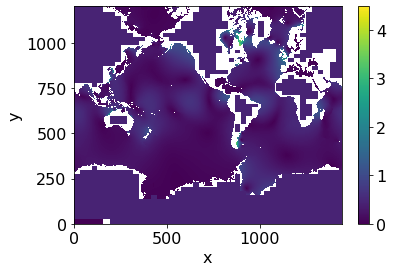

In [119]:
scalar2Ddata2.plot()

In [115]:
scalar2Ddata2

<xarray.DataArray (y: 1205, x: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 -1.0 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    nav_lon  (y, x) float32 -1.0 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
Dimensions without coordinates: y, x

In [128]:
ZPSlandmask=1-(deptht_ZPS[1:-1,1:-1]<0.01)

In [130]:
ZPSlandmask=ZPSlandmask.where(ZPSlandmask>0.5,drop=True)

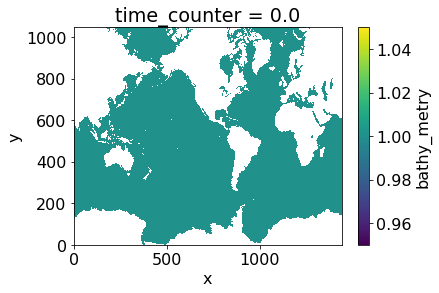

In [131]:
ZPSlandmask.plot()

In [148]:
tl=domcfgZPS.top_level
tl=np.squeeze(tl)
tl=tl[1:-1,1:-1]
tl=tl.where(tl>0.5,drop=True)
tl

<xarray.DataArray 'top_level' (y: 1054, x: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time_counter  float64 0.0
Dimensions without coordinates: y, x

In [151]:
nanpatch=np.ones([151,1440])*np.nan
np.shape(nanpatch)

(151, 1440)

In [176]:
mask=np.vstack((nanpatch,tl))

In [177]:
scalar2Ddata2=mask*scalar2Ddata2


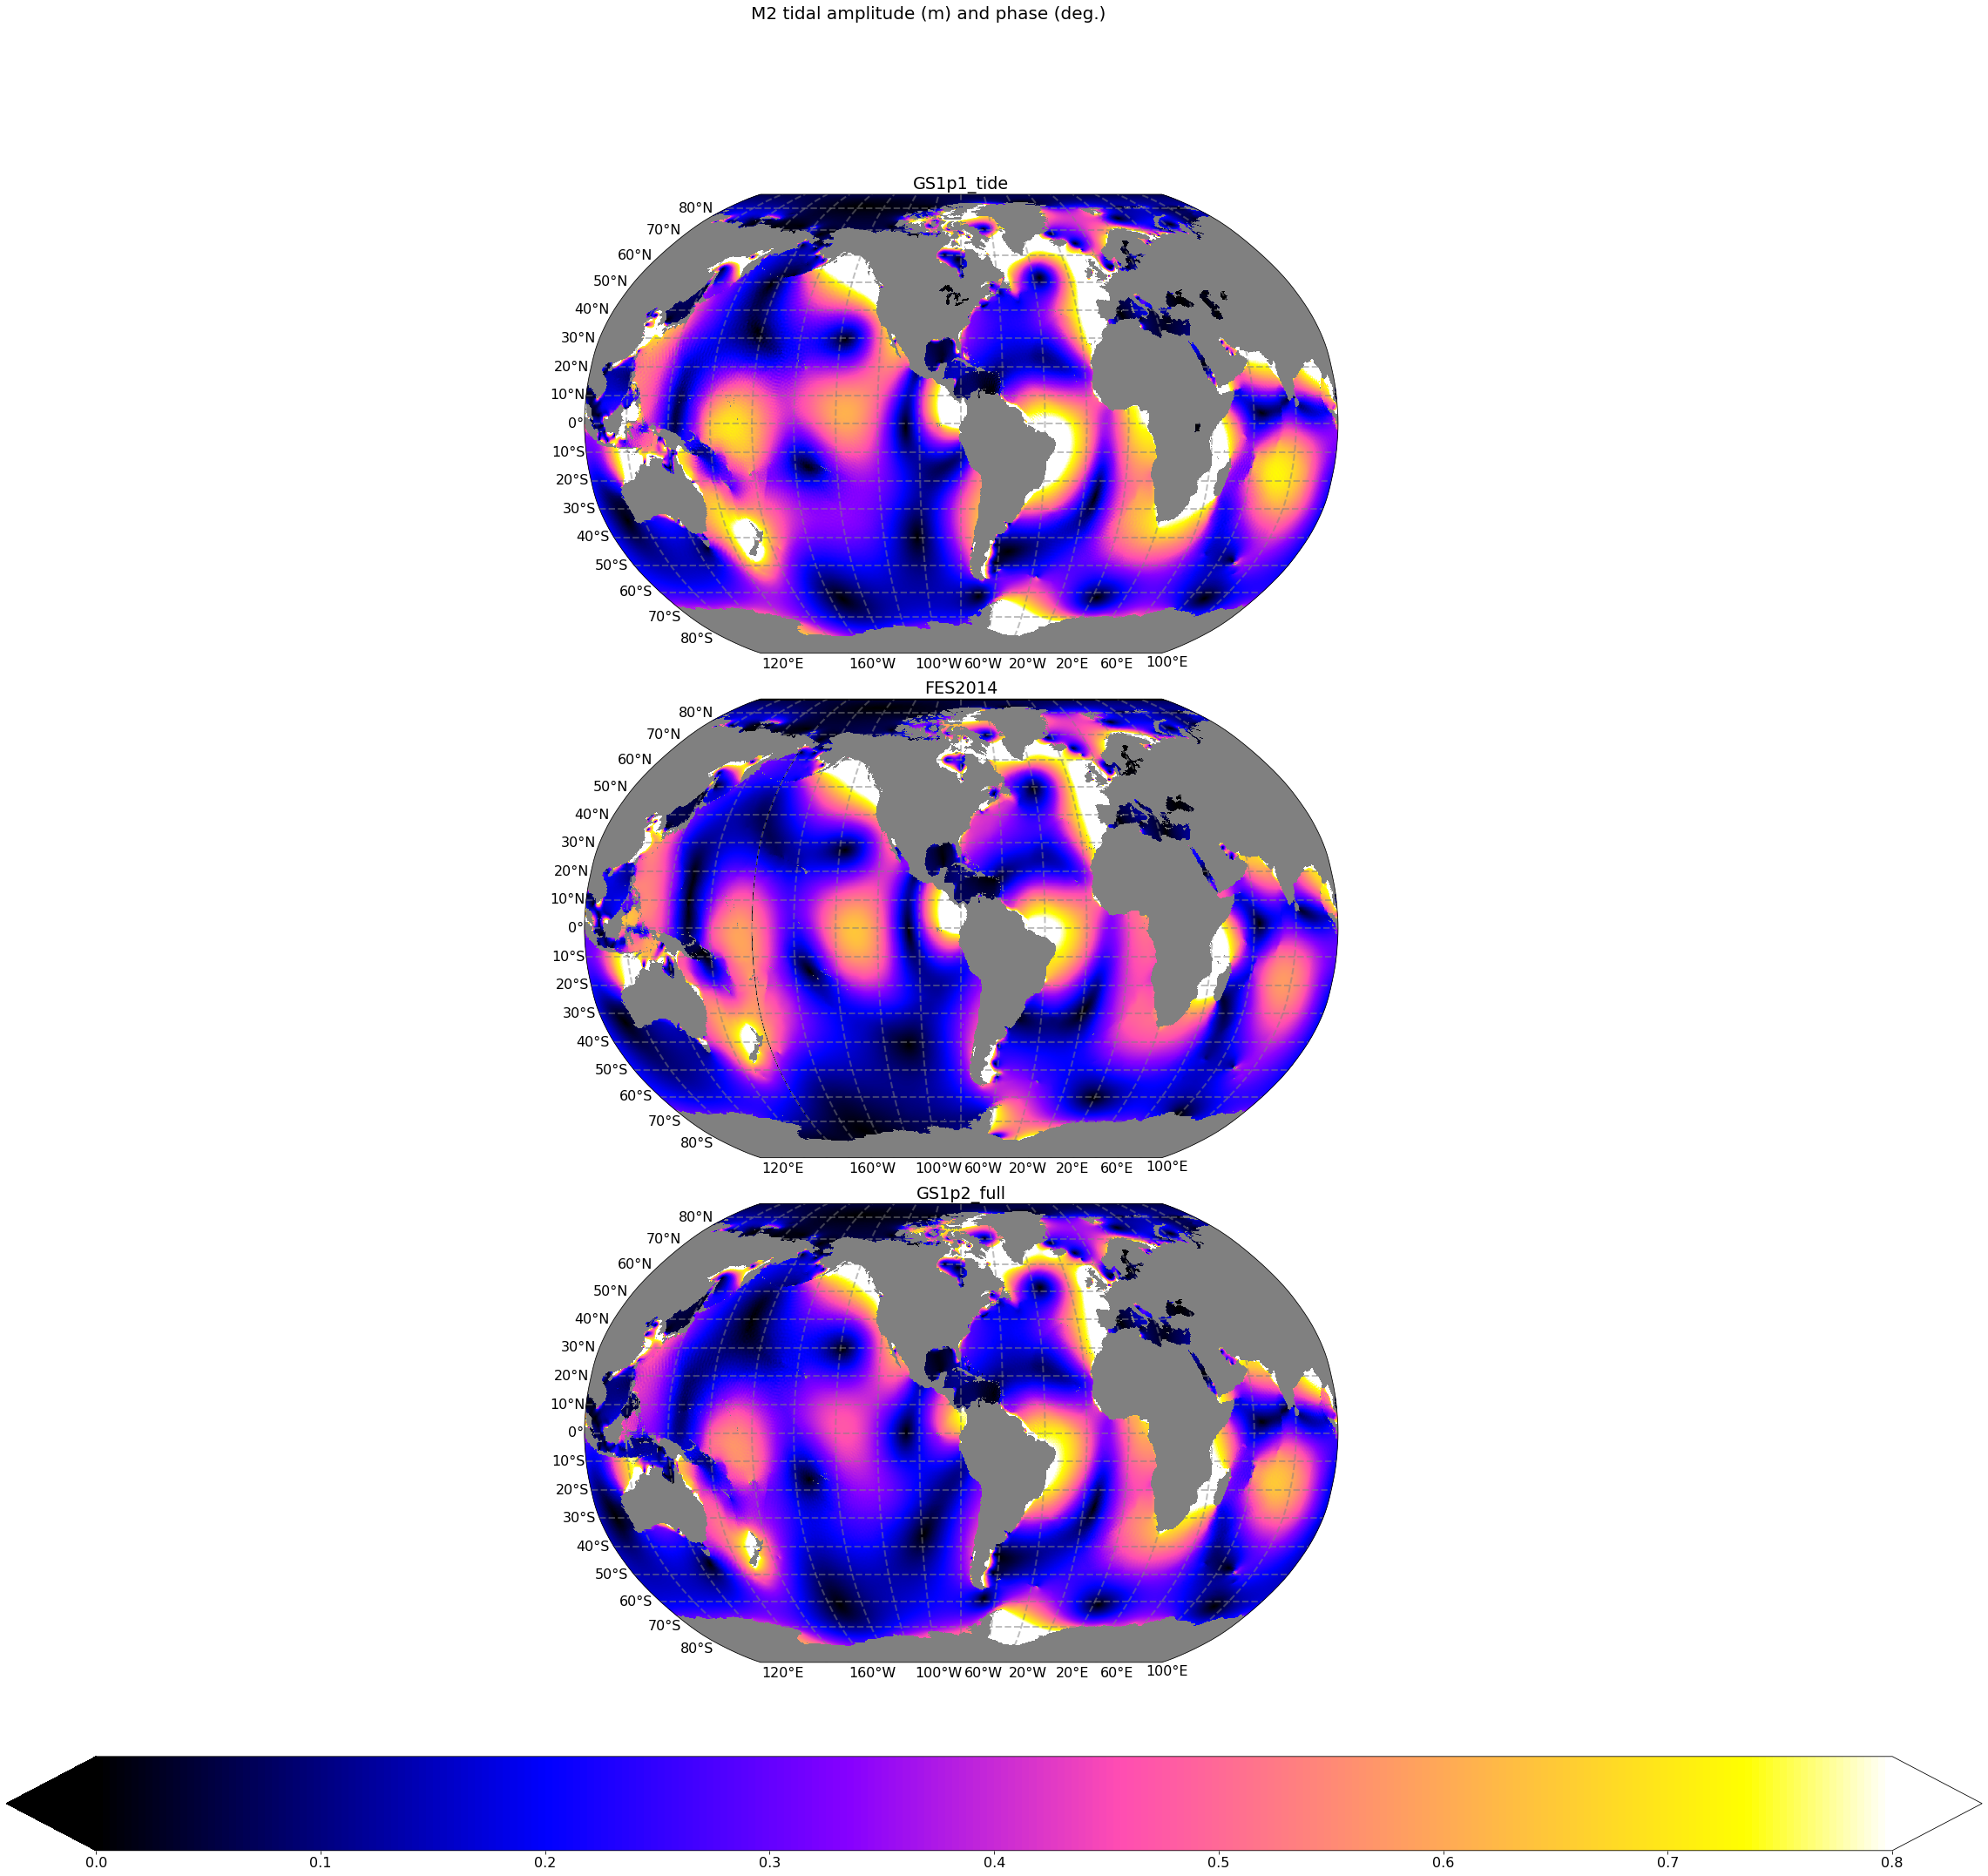

In [178]:
# Fixed parameters ------------------
#set default font size
mpl.rcParams.update({'font.size': 16})

#set figure title font size
tfs=20

clonfixed=-80 #fixed central longitude for our preferred version of the Robinson projection
fixedprojection=ccrs.Robinson(central_longitude=clonfixed)

# Preferred colormaps
cmapsequential='gnuplot2' #black-blue-magenta-orange-yellow-white
cmapsequentialflipped='gnuplot2_r' #same, but reversed
cmapdiverging_bwr='seismic' # blue-white-red : please ensure that white is centred on a feature of the data, e.g. its mean or zero: use sp1_vmin, sp1_vmax (above)
cmapdiverging_rwb='seismic_r' # red-white-blue: please ensure that white is centred on a feature of the data, e.g. its mean or zero

#-------------------------


# >>>>>  Adjustable parameters vvvvvvvvvvvvv

figtitle='M2 tidal amplitude (m) and phase (deg.)' #title for the figure
subplottitle1='GS1p1_tide' #subplot title for subplot 1

subplottitle2='FES2014' #subplot title for subplot 2

subplottitle3='GS1p2_full' #subplot title for subplot 3

# Define the min and max values of the range of data plotted in subplot 1
# Values outside this range will be included in the saturated regions of the colorbar
sp1_vmin=0
sp1_vmax=0.8

cmapselected=cmapsequential    #choose one from the 4 options: cmapsequential,cmapsequentialflipped,cmapdiverging_bwr,cmapdiverging_rwb (see below)
# >>>>> Adjustable parameters ^^^^^^^^^^^^^






# Make the plot

cMap = c.ListedColormap(['black',])

#Bad data (NaN) is set to grey -> land should be NaN and grey
cMap.set_bad('grey',1.)

def main():
    fig = plt.figure(figsize=(21*2, 15*2))
    
    fig.suptitle(figtitle, fontsize=tfs)
    
    plt.subplots_adjust(wspace=0.1,hspace=0.1)

    # This example has a single subplot, but multiple subplots could be used (although more of this script might need adjusting)
    # e.g. ax2 = fig.add_subplot(2, 1, 1, projection=fixedprojection); ax3 = fig.add_subplot(2, 1, 2, projection=fixedprojection); ...

    #--- subplot 1
    ax = fig.add_subplot(3, 1, 1, projection=fixedprojection)
    
    ax.set_title(subplottitle1)
    ax.set_global()
    
    ax.set_aspect(1.2)

    #sets the land colour as grey (must be missing data)
    ax.set_facecolor("grey") 
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=np.linspace(-160,200,19), ylocs=np.linspace(-80,80,17),    #sets the gridlines of lats and lons (do not change for global map)
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Plot scalar field, here using pcolormesh.  Could substitute another plotting method, but please attempt to retain 
    # this choice of colormap

    
    scalar_subplot = ax.pcolormesh(lon2D,lat2D, scalar2Ddata  , transform=ccrs.PlateCarree(), cmap=cmapselected, vmin=sp1_vmin, vmax=sp1_vmax)

    #--- subplot 2
    
    ax2 = fig.add_subplot(3, 1, 2, projection=fixedprojection)
    
    ax2.set_title(subplottitle2)
    ax2.set_global()
    
    ax2.set_aspect(1.2)

    #sets the land colour as grey (must be missing data)
    ax2.set_facecolor("grey") 
    
    gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=np.linspace(-160,200,19), ylocs=np.linspace(-80,80,17),    #sets the gridlines of lats and lons (do not change for global map)
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Plot scalar field, here using pcolormesh.  Could substitute another plotting method, but please attempt to retain 
    # this choice of colormap

    
    scalar_subplot = ax2.pcolormesh(lon2D,lat2D, scalar2Ddata2  , transform=ccrs.PlateCarree(), cmap=cmapselected, vmin=sp1_vmin, vmax=sp1_vmax)

    
    #--- subplot 3
    
    ax3 = fig.add_subplot(3, 1, 3, projection=fixedprojection)
    
    ax3.set_title(subplottitle3)
    ax3.set_global()
    
    ax3.set_aspect(1.2)

    #sets the land colour as grey (must be missing data)
    ax3.set_facecolor("grey") 
    
    gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=np.linspace(-160,200,19), ylocs=np.linspace(-80,80,17),    #sets the gridlines of lats and lons (do not change for global map)
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Plot scalar field, here using pcolormesh.  Could substitute another plotting method, but please attempt to retain 
    # this choice of colormap

    
    scalar_subplot = ax3.pcolormesh(lon2D,lat2D, scalar2Ddata3  , transform=ccrs.PlateCarree(), cmap=cmapselected, vmin=sp1_vmin, vmax=sp1_vmax)
    
    
    

    fig.subplots_adjust(bottom=0.1)
  
    cbar_ax = fig.add_axes([0.15, 0, 0.75, 0.05]) #position and shape of the colorbar on the figure
    fig.colorbar(scalar_subplot, cax=cbar_ax, orientation='horizontal', extend='both')  #plot the colorbar

    #uncomment the line below to save a .PNG version of the figure, with GMD's minimum requirement of 300 dpi
    plt.savefig("../plots/fig1_global_M2_maps.png", format="png", dpi=400, bbox_inches="tight",facecolor="white", edgecolor='none')
    
    plt.show()


if __name__ == '__main__':
    main()